Day_0502
- numpy : 넘파이 객체
- ndarray : 다차원 배열 객체

# Python 다차원 배열의 이해

## 숫자 자료형
- python에서는 숫자형 변수로 데이터를 표현할 수 있다.

In [1]:
# 세 명의 학생의 수학과목 점수 선언
math1 = 11
math2 = 12
math3 = 13

In [2]:
# 합과 평균구하기
total = math1 + math2 + math3
avg = total / 3
print(f'수학점수 합 : {total}')
print(f'수학점수 평균 : {avg:.2f}')

수학점수 합 : 36
수학점수 평균 : 12.00


- 새로 전학온 학생의 수학 점수가 추가가 된다면?
- 새로운 변수 선언과 합과 평균을 구하는 코드를 수정해야 할 필요가 생김

In [3]:
math4 = 14
total = math1 + math2 + math3 + math4
avg = total / 4
print(f'수학점수 합 : {total}')
print(f'수학점수 평균 : {avg:.2f}')

수학점수 합 : 50
수학점수 평균 : 12.50


## 리스트 자료형

In [4]:
math_list = [11, 12, 13]
total = 0
avg = 0

for math in math_list:
    total += math
avg = total / len(math_list)

print(f'수학점수 합 : {total}')
print(f'수학점수 평균 : {avg:.2f}')

수학점수 합 : 36
수학점수 평균 : 12.00


In [5]:
# 전학온 4번째 학생의 수학점수 추가
math_list.append(14)

total = 0
avg = 0

for math in math_list:
    total += math
avg = total / len(math_list)

print(f'수학점수 합 : {total}')
print(f'수학점수 평균 : {avg:.2f}')

수학점수 합 : 50
수학점수 평균 : 12.50


- 그런데 시험 문제에 오류가 발견되어 모든 학생의 점수를 1점씩 올려줘야 하는 상황이 발생된다면..?

In [6]:
# list comprehension
math_list = [math+1 for math in math_list]
print(math_list)

[12, 13, 14, 15]


- 여기서 구조를 확장해서...
- 1반의 점수가 11, 12, 13
- 2반의 점수가 21, 22, 23
- 3반의 점수가 31, 32, 33

In [7]:
nested_math_list = [[11, 12, 13],
                    [21, 22, 23],
                    [31, 32, 33]]
print(nested_math_list)

[[11, 12, 13], [21, 22, 23], [31, 32, 33]]


- <font color='red'>[문제점]</font>
    - 자료의 구조가 중첩되면 반복문도 중첩해서 사용해야 한다.
    - 자료의 충접이 증가할수록 코드는 복잡해질 수밖에 없다.

## Numpy로 구현한 다차원 배열
- **Numpy**를 사용하면 중첩된 자료구조를 효울적으로 다룰 수 있다.
- `import numpy as np` 형태로 사용하는게 일반적이다.

In [8]:
#!pip list

In [2]:
import numpy as np

In [10]:
# 파이썬 리스트를 이용한 넘파이 다차원배열 생성
math_ndarray = np.array(nested_math_list)

print(math_ndarray)
print(type(math_ndarray))

[[11 12 13]
 [21 22 23]
 [31 32 33]]
<class 'numpy.ndarray'>


- 각 원소에 1을 더하려면...

In [11]:
# BroadCasting
new_ndarray = math_ndarray + 1
print(new_ndarray)

[[12 13 14]
 [22 23 24]
 [32 33 34]]


- Numpy에 구현된 함수를 이용해서 합이난 평균도 쉽게 구할 수 있다.

In [12]:
# 전체 합 구하기
np.sum(math_ndarray)

198

In [13]:
# 전체 평균 구하기
np.average(math_ndarray)
np.mean(math_ndarray)

22.0

In [14]:
# 열의 평균 구하기
np.mean(math_ndarray, axis=0)

array([21., 22., 23.])

In [15]:
# 행의 평균 구하기(반 평균)
np.mean(math_ndarray, axis=1)

array([12., 22., 32.])

In [16]:
math_ndarray.shape

(3, 3)

## Numpy의 axis(축) 정리

- Numpy 라이브러리의 여러 함수에서 axis(축) 파라미터가 사용되며 다음과 같이 해석할 수 있다.
- 먼저 행렬의 모양을 다음과 같이 확인할 수 있다.
    - (행렬객체).shape
    - 2차원 행렬: (행, 열)
    - 3차원 행렬: (깊이, 행, 열)

### 2차원 행렬의 축
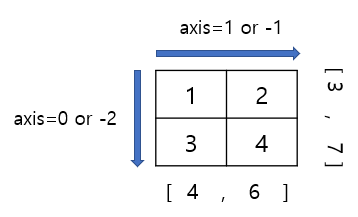
- axis를 0 또는 -2로 하면 **행 축을 기준으로** 더하라는 의미로 각 행에 있는 열의 값을 더해 하나로 만든다.
- axis를 1 또는 -1로 하면 **열 축을 기준으로** 더하라는 의미로 각 열에 있는 행의 값을 더해 하나로 만든다.
- (연산을 수행할때는 축의 값을 방향을 기준으로 생각)
- (구조를 바꿀때는 축의 값 그대로)

### 3차원 행렬의 축
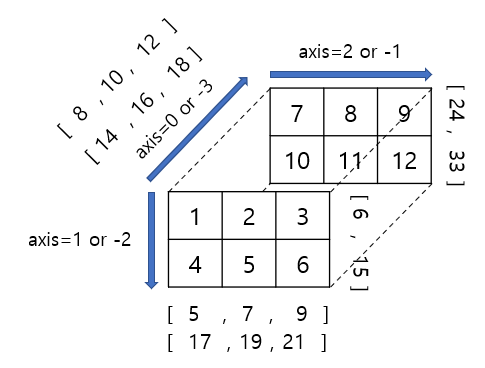
- axis를 0 또는 -3로 하면 **깊이를 기준으로** 더하라는 의미로 서로 마주하는 요소끼리 값을 더해 하나로 만든다.
- axis를 1 또는 -2로 하면 **행 축을 기준으로** 더하라는 의미로 서로 각 행에 있는 열의 값을 더해 하나로 만든다.
- axis를 2 또는 -1로 하면 **열 축을 기준으로** 더하라는 의미로 서로 각 열에 있는 행의 값을 더해 하나로 만든다.

In [17]:
import numpy as np

array1 = np.array([[1, 2], [3, 4]])
print(array1)
print(array1.shape)
print('-' * 30)

array2 = np.array([ [[1, 2, 3], [4, 5, 6]],  [[7, 8, 9], [10, 11, 12]] ])
print(array2)
print(array2.shape)

[[1 2]
 [3 4]]
(2, 2)
------------------------------
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)


In [18]:
print('2차원 배열의 aixs=0 기준 합 : ', end='')
print(np.sum(array1, axis=0))
print('2차원 배열의 aixs=1 기준 합 : ', end='')
print(np.sum(array1, axis=1))

print('3차원 배열의 aixs=0 기준 합 : ')
print(np.sum(array2, axis=0))
print('3차원 배열의 aixs=1 기준 합 : ')
print(np.sum(array2, axis=1))
print('3차원 배열의 aixs=2 기준 합 : ')
print(np.sum(array2, axis=2))

2차원 배열의 aixs=0 기준 합 : [4 6]
2차원 배열의 aixs=1 기준 합 : [3 7]
3차원 배열의 aixs=0 기준 합 : 
[[ 8 10 12]
 [14 16 18]]
3차원 배열의 aixs=1 기준 합 : 
[[ 5  7  9]
 [17 19 21]]
3차원 배열의 aixs=2 기준 합 : 
[[ 6 15]
 [24 33]]


# Numpy 특징

## Numpy의 장점
- ndarray는 타입을 명시하여 원소의 배열로 데이터를 유지
- 다차원 데이터도 연속된 메모리 공간이 할당됨
- 효율적인 메로리 사용이 가능하도록 구현됨
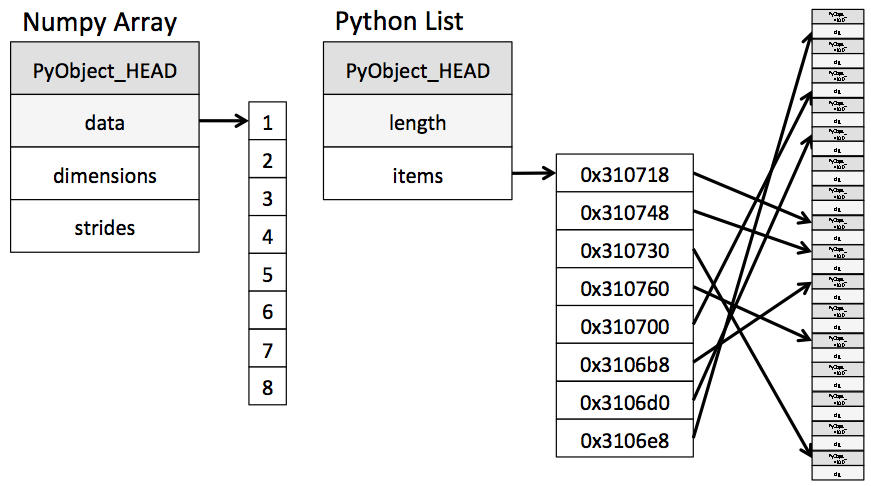

# 배열 생성 - 1

## array()를 이용한 생성
- 가장 기본적인 방법은 array() 함수를 사용하여 일반적인 Python의 리스트 또는 튜플에서 배열을 만드는 것이다.
- **다차원 배열의 모든 원소는 동일한 데이터 타입을 가져야 한다.**

In [19]:
import numpy as np

data = [0, 1, 2, 3]
a = np.array(data)
print(a, type(a))

[0 1 2 3] <class 'numpy.ndarray'>


In [20]:
a2 = np.array(data, dtype='float') # dtype = np.float
print(a2)

[0. 1. 2. 3.]


### 형변환

In [21]:
b = np.array(['1', '2', 3, 4], dtype=np.float64)
print(b)

[1. 2. 3. 4.]


## arange()를 이용한 생성
- 일련의 연속된 숫자를 만들기 위해 Python의 range()와 유사한 arange() 함수를 사용할 수 있다.

In [22]:
a = np.arange(1, 10)
print(a)

b = np.arange(10, 30, 5)
print(b)

print(np.arange(10))

[1 2 3 4 5 6 7 8 9]
[10 15 20 25]
[0 1 2 3 4 5 6 7 8 9]


## Numpy 배열의 주요 속성

1) ndarray.shape
- numpy array 객체의 차원을 튜플 타입으로 반환

2) ndarray.dtype
- 배열의 자료형을 반환

3) ndarry.ndim
- 배열의 차수를 정수로 반환(차원)

4) ndarry.size
- 배열의 요소의 총 개수를 정수 값으로 반환

5) ndarry.nbytes
- 배열 객체의 메모리 크기 반환

In [23]:
# 단일 값(스칼라)
a = np.array(10)
print(a)
print(a.dtype)
print(a.ndim) # 0차원
print(a.shape)
print(a.nbytes)
print(a.size)

10
int32
0
()
4
1


In [24]:
# 1차원 배열(벡터)
b = np.array([1, 2, 3, 4, 5])
print(b)
print(b.dtype)
print(b.ndim) # 1차원
print(b.shape)
print(b.nbytes)
print(b.size)

[1 2 3 4 5]
int32
1
(5,)
20
5


In [25]:
# 2차원 배열(행렬)
c = np.array([[1, 2], [3, 4], [5, 6]], )
print(c)
print(c.dtype)
print(c.ndim) # 2차원
print(c.shape)
print(c.nbytes)
print(c.size)

[[1 2]
 [3 4]
 [5 6]]
int32
2
(3, 2)
24
6


In [26]:
# 3차원 배열(텐서)
d = np.array([ [[1, 2, 3], [4, 5, 6]],  [[7, 8, 9], [10, 11, 12]] ])
print(d)
print(d.dtype)
print(d.ndim) # 3차원
print(d.shape)
print(d.nbytes)
print(d.size)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
int32
3
(2, 2, 3)
48
12


# 배열 생성 - 2

## numpy.zeros()
- 모든 요소가 0으로 이루어진, 지정한 크기의 새로운 배열을 생성
- zeors_like() : 기존 배열과 모양이 같은 배열을 생성

In [27]:
a = np.zeros(4, dtype=int)
print(a)

b = np.zeros((3, 3))
print(b)

c = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
d = np.zeros_like(c)
print(d)

[0 0 0 0]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


## numpy.ones()
- 모든 요소가 1로 이루어진, 지정한 크기의 새로운 배열을 생성
- ones_like)() : 기존 배열과 모양이 같은 1으로 채워진 배열을 생성

In [28]:
print(np.ones((2, 3)))
print(np.ones((2, 3), dtype=int))

print(np.ones_like(c))

[[1. 1. 1.]
 [1. 1. 1.]]
[[1 1 1]
 [1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


## numpy.full()
- 지정한 크기에 입력한 원소를 전부 채운 행렬을 만든다.
- full_like() : 기존의 배열과 모양이 같으면서 지정된 값으로 채워진 배열 생성

In [29]:
print(np.full((2, 2), 10))

[[10 10]
 [10 10]]


## [연습문제]
- 1~10 사이의 값에 대해 다음의 조건에 맞는 2차원 배열을 생성하시오.
- 첫 번째 행은 역순으로 나열된 홀수 정수의 요소를 갖고, 두 번째 행은 짝수 정수의 요소를 갖는다.

In [30]:
data = np.array([np.arange(9, 0, -2), np.arange(2, 11, 2)])
print(data)

[[ 9  7  5  3  1]
 [ 2  4  6  8 10]]


# 배열 생성 -3

## numpy.linspace()
- start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수


In [31]:
# 0이상 2이하의 범위를 9개만큼 등분하영 요소들을 생성
print(np.linspace(0, 2, 9))

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


In [10]:
a = np.linspace(1.0, 3.0, num=5)
b = np.linspace(1.0, 3.0, 20)

print(a)
print(b)

[1.  1.5 2.  2.5 3. ]
[1.         1.10526316 1.21052632 1.31578947 1.42105263 1.52631579
 1.63157895 1.73684211 1.84210526 1.94736842 2.05263158 2.15789474
 2.26315789 2.36842105 2.47368421 2.57894737 2.68421053 2.78947368
 2.89473684 3.        ]


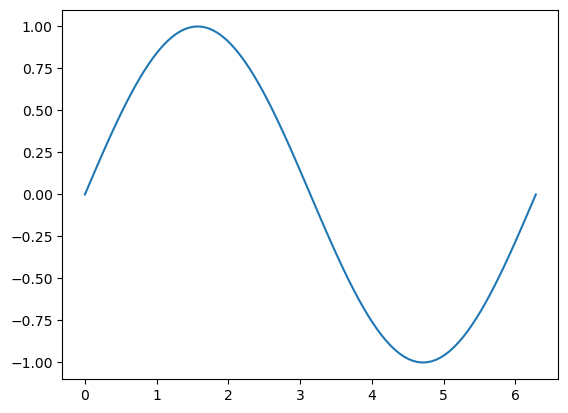

In [33]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

## numpy.identity(), numpy.eye()
- 지정된 크기의 정방 단위 행렬을 생성
- 선형대수학에서 단위 행렬은 주대각선의 원소가 모두 1이며, 나머지 원소는 0인 정사각형 행렬이다.

In [34]:
print(np.identity(2))
print(np.identity(3, dtype=int))

print(np.eye(3))

# eye() 함수는 행과 열의 크기가 다른 단위행렬도 만들 수 있다.
print(np.eye(3, 4))

[[1. 0.]
 [0. 1.]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [12]:
# 세 번째 값 1: 대각선 인덱스, 0(기본값)은 주대각선을 나타내고
# 양수 값은 위쪽 대각선(열)을 나타내고,
# 음수 값은 아래쪽 대각선(행)을 나타낸다.
print(np.eye(3, 4, 1)) # (0, 1)
print(np.eye(3, 4, -1)) # (2, 0)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


# 배열의 변경

## numpy.reshape() / ndarray.reshape()
- <font color='red'>원본을 변경하지 않고 새로운 모양의 배열을 생성한다.</font>

In [36]:
import numpy as np

a = np.arange(6)
print(a)

b = a.reshape((3, 2)) # np.reshape(a, (3,2))과 동일
print(b)
print(a) # 원본 배열의 모양은 변하지 않는다.
print('-' * 30)

c = np.reshape(a, (1, 6))
print(c, c.ndim) # 차원(차수) 확인
print('-' * 30)

d = np.reshape(a, 6) # 벡터의 크기만 잡아주면 1차원으로 변경됨
print(d, d.ndim) # 차원(차수) 확인
print('-' * 30)

# 행의 크기가 음수이면, 열의 크기를 2로 맞추고 행의 크기는 전체 요소 개수에 맞춰서 알아서 지정한다.
e = np.reshape(a, (-1, 2))
print(e)
print('-' * 30)

f = np.arange(1, 11).reshape(2, 5)
# 2행 1열의 모양으로 행렬을 변환하면서 깊이의 값을 알아서 정하도록 한다.
g = f.reshape(-1, 2, 1) # 3차원 배열
print(g)
print('-' * 30)

# -1의 의미는 행렬의 값이 없으므로 요소를 한 줄로 나타낸다. 
h = g.reshape(-1) # 3차원 배열 -> 1차원 배열, 음수니까 알아서
print(h)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
------------------------------
[[0 1 2 3 4 5]] 2
------------------------------
[0 1 2 3 4 5] 1
------------------------------
[[0 1]
 [2 3]
 [4 5]]
------------------------------
[[[ 1]
  [ 2]]

 [[ 3]
  [ 4]]

 [[ 5]
  [ 6]]

 [[ 7]
  [ 8]]

 [[ 9]
  [10]]]
------------------------------
[ 1  2  3  4  5  6  7  8  9 10]


## ndarray.resize()
- <font color='red'>원본 배열을 새로운 모양으로 수정한다.</font>
- 대상 배열의 요소의 개수가 원래 배열과 동일하지 않으면 크기를 강제로 조정한다.

In [37]:
a = np.arange(12)
a.resize((3, 4))
print(a) # resize()는 원본의 모양을 변경한다.
print('-' * 30)

a.resize((4, 4)) # reshape와 다르게 원본가 크기가 달라도 오류가 발생되지 않는다.
print(a) # 빈 값은 0으로 채운다.

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
------------------------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  0  0  0]]


## ndarray.flatten() / ndarray.ravle()
- 배열을 1차원으로 만든다.
- flatten(): 배열을 복사해서 1차원으로 변경하기 때문에 **원본에 영향을 미치지 않는다.**
- ravle(): 원본을 복사하는 것이 아니므로 메모리의 낭비가 없다. **원본의 영향을 받는다.**

In [38]:
a = np.array([[1, 2], [3, 4]])
print(a)

print(a.flatten()) # 복사

[[1 2]
 [3 4]]
[1 2 3 4]


In [39]:
b = np.arange(1, 10).reshape(1, 3, 3)
print(b)
print('-' * 30)

c = b.flatten() 
print(c)
print('-' * 30)

d = b.ravel()
print(d)

b[0, 1, 1] = 10
print(b)
print(d)
print(c) # flatten() 원본 영향X

[[[1 2 3]
  [4 5 6]
  [7 8 9]]]
------------------------------
[1 2 3 4 5 6 7 8 9]
------------------------------
[1 2 3 4 5 6 7 8 9]
[[[ 1  2  3]
  [ 4 10  6]
  [ 7  8  9]]]
[ 1  2  3  4 10  6  7  8  9]
[1 2 3 4 5 6 7 8 9]


## np.expand_dims()
- 지정한 aixs의 위치에 배열의 차원을 늘려서 줌

In [40]:
a = np.array([1, 2])
print(a)
print(a.shape)
print('-' * 30)

# 1차원 벡터에 첫 번째 축(행 축)을 추가하여 2앞에 1이 추가되어 (1, 2)의 모양으로 확장
# a[np.newaixs, :]와 동일
b = np.expand_dims(a, axis=0)
print(b)
print(b.shape)
print('-' * 30)

# 1차원 벡터에 두 번째 축(열 축)을 추가해서 2뒤에 1이 추가되어 (2, 1)의 모양으로 확장
# a[:, np.newaixs]와 동일
c = np.expand_dims(a, axis=1)
print(c)
print(c.shape)

[1 2]
(2,)
------------------------------
[[1 2]]
(1, 2)
------------------------------
[[1]
 [2]]
(2, 1)


In [41]:
# 2차원 -> 3차원
a = np.arange(1, 7).reshape(2, 3)
print(a)
print(a.shape)
print('-' * 30)

# 2차원 행렬을 깊이 축(axis=0)으로 확장
b = np.expand_dims(a, axis=0)
print(b)
print(b.shape)
print('-' * 30)

# 2차원 행렬을 행 축(axis=1)으로 확장
c = np.expand_dims(a, axis=1)
print(c)
print(c.shape)
print('-' * 30)

# 2차원 행렬을 열 축(axis=2)으로 확장
d = np.expand_dims(a, axis=2)
print(d)
print(d.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)
------------------------------
[[[1 2 3]
  [4 5 6]]]
(1, 2, 3)
------------------------------
[[[1 2 3]]

 [[4 5 6]]]
(2, 1, 3)
------------------------------
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
(2, 3, 1)


In [42]:
# np.newaixs를 이용해서 차원을 늘릴 수도 있다.
a = np.arange(4)
print(a)
print(a.shape)
print('-' * 30)

row_vec = a[np.newaxis, :]
print(row_vec)
print(row_vec.shape)
print('-' * 30)

col_vec = a[:, np.newaxis]
print(col_vec)
print(col_vec.shape)

[0 1 2 3]
(4,)
------------------------------
[[0 1 2 3]]
(1, 4)
------------------------------
[[0]
 [1]
 [2]
 [3]]
(4, 1)


## ndarray.astype()
- 배열의 데이터 타입을 변경

In [43]:
a = np.array([1, 2 ,3])
print(a)
print(a.dtype)

a_float = a.astype(np.float32)
print(a_float)
print(a_float.dtype)

[1 2 3]
int32
[1. 2. 3.]
float32


 Day_0503

## numpy.squeeze()
- 차원 축소

In [44]:
import numpy as np

a = np.array([[[0], [1], [2]]])
print(a)
print(a.shape)

b = np.squeeze(a)
print(b)
print(b.shape)
print('-' * 30)

c = np.squeeze(a, axis=0) # 깊이 축 축소
print(c)
print(c.shape)
print('-' * 30)

# 원본의 원소 개수와 일치되지 않아 VauleError 발생
# d = np.squeeze(a, axis=1)

e = np.squeeze(a, axis=2)
print(e)
print(e.shape)

[[[0]
  [1]
  [2]]]
(1, 3, 1)
[0 1 2]
(3,)
------------------------------
[[0]
 [1]
 [2]]
(3, 1)
------------------------------
[[0 1 2]]
(1, 3)


## nupmy.concatenate()
- 두 개 이상의 배열을 연결한다.
- concatenate()함수를 수행하려면 **차원 수가 같아야** 한다.
- axis 인수를 설정하여 연결 방향을 정할 수 있다. (default: axis=0)
- 행을 기준으로 연결을 할 때에는 **열의 갯수가 일치**해야하며, 열을 기준으로 연결할 때에는 **행의 갯수가 일치**해야 한다.

In [45]:
a = np.array([[1, 2], [3, 4]])
print(a)
print('-' * 30)

# 차원 수가 다르기 때문에 Error
b = np.array([5, 6])
print(b)
print('-' * 30)

# b에 행축 추가
c = np.concatenate((a, np.expand_dims(b, axis=0))) # 연결하려는 배열을 리스트 or 튜플로 전달
print(c)
print('-' * 30)

d = np.concatenate((a, np.expand_dims(b, axis=0), c))
print(d)
print('-' * 30)

# .T: 2행 6열이 6행 2열로 전치
e = np.concatenate((a, d.T), axis=1)
print(e)

[[1 2]
 [3 4]]
------------------------------
[5 6]
------------------------------
[[1 2]
 [3 4]
 [5 6]]
------------------------------
[[1 2]
 [3 4]
 [5 6]
 [1 2]
 [3 4]
 [5 6]]
------------------------------
[[1 2 1 3 5 1 3 5]
 [3 4 2 4 6 2 4 6]]


# 기본 연산
- 배열에 대한 산술 연산은 **요소별(element-wise)**로 적용된다.


## 산술 연산

In [46]:
# 더하기
a = np.add(1.0, 4.0)
print(a)
print('-' * 30)

b = np.arange(9.0).reshape(3, 3)
c = np.arange(3.0)
print("b: ", b)
print("c: ",c)
print(np.add(b, c)) # 아래와 동일
print(b + c)
print('-' * 30)

# 뺄샘
print(np.subtract(b, c))
print('-' * 30)

# 곱샘
print(np.multiply(b, c))
print('-' * 30)

# 나눗셈
print(np.divide(b, c))

5.0
------------------------------
b:  [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
c:  [0. 1. 2.]
[[ 0.  2.  4.]
 [ 3.  5.  7.]
 [ 6.  8. 10.]]
[[ 0.  2.  4.]
 [ 3.  5.  7.]
 [ 6.  8. 10.]]
------------------------------
[[0. 0. 0.]
 [3. 3. 3.]
 [6. 6. 6.]]
------------------------------
[[ 0.  1.  4.]
 [ 0.  4. 10.]
 [ 0.  7. 16.]]
------------------------------
[[nan 1.  1. ]
 [inf 4.  2.5]
 [inf 7.  4. ]]


C:\Users\user\AppData\Local\Temp\ipykernel_12260\560614004.py:23: RuntimeWarning: divide by zero encountered in true_divide
  print(np.divide(b, c))
C:\Users\user\AppData\Local\Temp\ipykernel_12260\560614004.py:23: RuntimeWarning: invalid value encountered in true_divide
  print(np.divide(b, c))


In [47]:
# floor_divide(): 몫 구하기
a = np.arange(5)
b = np.floor_divide(a, 4) # 파이썬의 //와 동일
print(b)

# reaminder() / mod(): 나머지 구하기
a = np.remainder([4, 7], [2, 3])
print(a)

[0 0 0 0 1]
[0 1]


- 연산 시 자료형은 적절하게 형변환(Upcasting) 된다.

In [48]:
a = np.ones(3, dtype=np.int32)
print(a)
print(a.dtype.name)

b = np.linspace(0, np.pi, 3)
print(b)
print(b.dtype.name)

c = a + b
print(c)
print(c.dtype.name)

[1 1 1]
int32
[0.         1.57079633 3.14159265]
float64
[1.         2.57079633 4.14159265]
float64


## 통계 연산
- 통계 연산은 aixs와 밀접한 관계가 있다.
- 축 값을 입력하지 않으면 모든 원소에 대한 연산 결과를 출력한다.

In [49]:
# 합계: sum() / 평균: mean() / 누적합: cumsum()
a = np.arange(12).reshape(3, 4)
print(a)

print(a.sum()) # 모든 원소에 대한 합, np.sum(a)
print(a.sum(axis=0)) # 각 열의 합
print(a.sum(axis=1)) # 각 행의 합
print(a.cumsum(axis=1)) # 각 행의 누적합

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
66
[12 15 18 21]
[ 6 22 38]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


numpy.mean()
- 축을 따라 산술 평균을 계산

In [50]:
a = np.arange(9).reshape(3, 3)
print(a)

print(np.mean(a, axis=0))
print(np.mean(a))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[3. 4. 5.]
4.0


np.average()
- 주어진 축에 따라 가중평균을 계산
- avg = sum(a * weight) / sum(weight)
 


In [51]:
a = np.arange(6).reshape(3, 2)
print(a)

# 0.75 = (0 * 1/4 + 1 * 3/4) / (1/4 + 3/4)
np.average(a, axis=1, weights=[1/4, 3/4])

[[0 1]
 [2 3]
 [4 5]]


array([0.75, 2.75, 4.75])

numpy.amin() / numpy.min(), numpy.amax() / numpy.max()
- 축을 따른 배열의 최소/최대값

In [52]:
a = np.arange(1, 10).reshape(3, 3)
print(a)

print(np.amin(a, axis=0))
print(np.max(a))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
9


numpy.median()
- 축을 따른 배열의 중앙값

In [53]:
a = np.arange(1, 10).reshape(3, 3)
print(a)

print(np.median(a, axis=0))
print(np.median(a))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[4. 5. 6.]
5.0


nupmy.var(), numpy.std()
- 축을 따른 배열의 분산, 표준편차 계산

In [54]:
print(np.var(a, 0))
print(np.var(a))

print(np.std(a))
print(f'{np.std(a):.2f}') # 문자
print(np.round(np.std(a), 2)) # 숫자

[6. 6. 6.]
6.666666666666667
2.581988897471611
2.58
2.58


numpy.maximum()
- 두 개의 배열을 가져와 요소별 최댓값 계산
- broadcasting 될 수 있다.

In [55]:
a = np.array([3, 6, 1])
b = np.array([4, 2, 9])

print(np.maximum(a, b))

[4 6 9]


## 최소값, 최대값 아규먼트 위치
- numpy.argmax(): 제일 큰 값 위치 정보
- numpy.argmin(): 제일 작은 값 위치 정보
- numpy.where(조건): 조건에 맞는 값 위치 정보
- numpy.where(조건, 조건에 맞을 때 값, 조건과 다를 때 값): 조건 결과에 따른 원소 값 변경

In [56]:
a = np.array([5, 6, 7, 8, 1, 9, 3, 4])
print(a)

# 가장 큰 값의 위치 정보
print(np.argmax(a))
# 가장 작은 값의 위치 정보
print(np.argmin(a))

[5 6 7 8 1 9 3 4]
5
4


In [57]:
# 5를 초과하는 위치 정보
print(np.where(a > 5))
# 5를 초과하는 위치는 1, 아니면 -1
print(np.where(a > 5, 1, -1))
# 5를 초과하는 값은 원래 원소의 값, 아니면 0
print(np.where(a > 5, a, 0))

(array([1, 2, 3, 5], dtype=int64),)
[-1  1  1  1 -1  1 -1 -1]
[0 6 7 8 0 9 0 0]


## 비교연산
- ==, !=, >=, <=, >, <

In [6]:
a = np.array([1, 2, 3])
b = np.array([1, 2 ,3])
c = np.array([3, 2, 5])

# 원소별로 비교
print(a == b)
print(a == c)

[ True  True  True]
[False  True False]


In [5]:
a = np.arange(1, 10).reshape(3, 3)
print(a)

result = a % 2 == 0
print(result)
print(a[result])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[False  True False]
 [ True False  True]
 [False  True False]]
[2 4 6 8]


numpy.all(), numpy.any()
- all(): 전체 요소가 같아야 하나의 True값을 반환
- any(): 전체 요소중 하나만 같아도 True값을 반환

In [4]:
a = np.array([1, 2, 3])
b = np.array([1, 2 ,3])
c = np.array([3, 2, 5])

print(np.all(a == b))
print(np.all(a == c))

print(np.any(a == c))

True
False
True


## 논리 연산
- numpy.logical_and(), numpy.logical_or(), numpy.logical_not(), numpy.logical_xor()

In [3]:
x = np.arange(1, 11).reshape(2, 5)
print(x)
print('-' * 30)

y = x % 2 == 0
print('y행렬: 짝수면 True, 홀수면 False')
print(y)
print('-' * 30)

z = x >= 4
print('z행렬: 4이상이면 True, 미만이면 False')
print(z)
print('-' * 30)

print('y and z 행렬')
print(np.logical_and(y, z)) # 4이상이면서 짝수
print('y and z 행렬의 총합')
print(np.sum(np.logical_and(y, z))) # True(1)의 갯수의 합 : 4개
print(np.sum(x[np.logical_and(y, z)]))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
------------------------------
y행렬: 짝수면 True, 홀수면 False
[[False  True False  True False]
 [ True False  True False  True]]
------------------------------
z행렬: 4이상이면 True, 미만이면 False
[[False False False  True  True]
 [ True  True  True  True  True]]
------------------------------
y and z 행렬
[[False False False  True False]
 [ True False  True False  True]]
y and z 행렬의 총합
4
28


## 정렬

In [68]:
import numpy as np

np.random.seed(10) # seed(): 랜던값 고정
data = np.random.randint(1, 50, 10)
print(data)

[10 37 16  1 29 26 30 49 30  9]


- numpy.sort(): 데이터를 오름차순으로 정렬한다.
- 내림차순으로 정렬하는 별도의 옵션은 없다.

In [16]:
np.sort(data)

array([ 1,  9, 10, 16, 26, 29, 30, 30, 37, 49])

In [31]:
np.sort(data)[::-1]

array([49, 37, 30, 30, 29, 26, 16, 10,  9,  1])

- numpy.argsort(): 오름차순으로 정렬한 데이터의 정렬 전 인덱스 값을 반환

In [69]:
np.argsort(data) #  정렬 전 인덱스 값
# [10 37 16  1 29 26 30 49 30  9]

array([3, 9, 0, 2, 5, 4, 6, 8, 1, 7], dtype=int64)

In [71]:
# argsort()를 이용한 정렬
idx = np.argsort(data)
print(data[idx])

[ 1  9 10 16 26 29 30 30 37 49]


## [문제] 학생 이름과 점수 데이터를 이용하여 성적이 우수한 학생 순서로 이름을 출력하시오.

In [100]:
name = ['홍길동', '저팔계', '사오정', '전우치', '삼장법사']
score = [75, 100, 95, 56, 99]

name = np.array(name)
score = np.array(score)
sorted_index = np.argsort(score)[::-1]
                               
print(name[sorted_index])

['저팔계' '삼장법사' '사오정' '홍길동' '전우치']


# 행렬연산

## * 연산자
- 형태(shape)가 동일한 두 행렬을 원소끼리(element-wise) 곱하는 연산자
- shape이 다르면 오류 발생
- **교환법칙이 성립**된다.

In [99]:
import numpy as np

A = np.array([[1, 1],
              [0,1]])
B = np.array([[2, 0],
              [3, 4]])

print(A * B)
print(B * A) # 교환법칙 성립

A = np.arange(6).reshape(2, 3)
B = np.arange(6).reshape(3, 2)
# print(A * b) # shape이 달라서 오류

[[2 0]
 [0 4]]
[[2 0]
 [0 4]]


## numpy.dot()
- 두 벡터의 내적을 계산하는 함수
    - 내적이란 벡터에서 서로 대응하는 성분끼리 곱한 다음 그것들을 모두 더한 것을 말하며, 내적의 결과는 스칼라(단일 값)가 된다.
    - a·b 또는 <a,b>로 표현: a1*b1 + a2*b2 + ... + an*bn
- 행렬곱에도 사용될 수 있다.
- 행렬곱이 이뤄지기 위해서는 첫 번째 행렬의 열크기와 두 번째 행렬의 행의 크기가 같아야한다.

In [109]:
a = np.array([3, 4, 6, 8, 9])
b = np.array([7, 3, 1, 4, 7])
c = np.dot(a, b)
print(c)

134


In [122]:
a = np.array([[1, 1], [0, 1]])
b = np.array([[2, 0], [3, 4]])
print(a)
print(b)
print('-' * 30)

print(np.dot(a,b)) # a.dot(b)와 동일
print()
print(np.dot(b, a)) # 교환 법칙이 성립되지 않는다.

[[1 1]
 [0 1]]
[[2 0]
 [3 4]]
------------------------------
[[5 4]
 [3 4]]

[[2 2]
 [3 7]]


## numpy.matmul() / @ 연산자
- numpy.dot()을 이용하여 행렬곱을 수행할 수 있지만, numpy공식 문서에서는 .matmul() 사용을 권장(3차원 이상의 행렬곱에서는 연산의 결과가 다름)

In [130]:
a = np.array([[1, 1], [0, 1]])
b = np.array([[2, 0], [3, 4]]) 
print(a)
print(b)
print('-' * 30)

print(np.matmul(a, b))
print(a@b) # 파이썬 3.5 버전 부터 가능

[[1 1]
 [0 1]]
[[2 0]
 [3 4]]
------------------------------
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


## 전치(transpose)
- 전치는 기존 행렬과 행과 열을 교환하는 것. 즉, 주대각선을 기준으로 반사 대칭하는 것을 말한다.
- 배열 객체의 'T' 속성을 사용하거나 nupmy.transpose()함수 이용

In [131]:
a = np.array([[1, 2], [3, 4]])
b = a.T
c = np.transpose(a)
print(a)
print(b)
print(c)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


# 인덱싱, 슬라이싱

## 인덱싱

In [136]:
a = np.arange(1, 11).reshape(2, 5)
print(a)
print(a[0][0])
print(a[0, 0]) # 파이썬 리스트는 이런식 X, numpy O

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
1
1


In [140]:
a = np.arange(10)**3
print(a)
print(a[2])
print(a[2:5])

[  0   1   8  27  64 125 216 343 512 729]
8
[ 8 27 64]


### Boolean Indexing (masking)

In [160]:
a = np.arange(1, 25).reshape(4, 6)
print(a)

# a 배열에서 요소의 값이 짝수인 요소들의 총 합은?
print(np.sum(a[a % 2 == 0]))
# print(sum(a[np.where(a % 2 == 0)]))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
156


### Fancy Indexing
- 배열의 각 요소 선택을 **인덱스 배열을 전달하여** 참조하는 방식
- Fancy Indexing은 복사본이 생성된다.

In [188]:
a = np.arange(15).reshape(5, 3)
print(a)
print('-' * 30)

# 0행, 2행만 인덱싱
print(a[[0, 2], :])
print('-' * 30)

# 전체 행에대해 0열 2열만 인덱싱
print(a[:, [0, 2]])
print('-' * 30)

# 1행과 2열만 인덱싱
print(a[[1, 2]])
print('-' * 30)

# 두 번 인덱싱
# 0, 2, 4행에서 0, 2열 추출
print(a[[0, 2, 4]][:, [0, 2]])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
------------------------------
[[0 1 2]
 [6 7 8]]
------------------------------
[[ 0  2]
 [ 3  5]
 [ 6  8]
 [ 9 11]
 [12 14]]
------------------------------
[[3 4 5]
 [6 7 8]]
------------------------------
[[ 0  2]
 [ 6  8]
 [12 14]]


In [198]:
a = np.arange(15).reshape(5, 3)
print(a)
print('-' * 30)

copied = a[[0, 2, 4]][:, [0, 2]]
print(copied)
print('-' * 30)

copied[0, :] = 100 # 0행의 모든 열 값
print(copied)
print('-' * 30)

print(a) # 원본 영향X

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
------------------------------
[[ 0  2]
 [ 6  8]
 [12 14]]
------------------------------
[[100 100]
 [  6   8]
 [ 12  14]]
------------------------------
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 슬라이싱
- a[행 슬라이스 시작:행 슬라이스 끝, 열 슬라이싱 시작:열 슬라이싱 끝]
- numpy에서 슬라이싱은 동일한 메모리 영역의 뷰를 반환한다.
- 즉, 뷰를 변경할 경우에는 원본 데이터의 원소도 변경된다.

In [204]:
a = np.arange(1, 13).reshape(3, 4)
print(a)
print('-' * 30)

print(a[0:2, 0:4])
print('-' * 30)

print(a[:2, :]) # 위와 동일
print('-' * 30)

print(a[:2]) # 위와 동일

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]


In [215]:
a_view = a[:1]
print(a_view)

a_view[0] = [9, 10, 11, 12]

print(a) # 원본 데이터 변경

[[ 9 10 11 15]]
[[ 9 10 11 12]
 [ 5  6  7  8]
 [ 9 10 11 12]]


## [문제] 슬라이싱 실습

In [267]:
origin = np.arange(1, 25).reshape(4, 6)
print(origin)
print('-' * 30)

# (1) 가운데 요소 가져오기
print(origin[1:3, 2:4])
print('-' * 30)

# (2) 전체 행, 1,2열
print(origin[:, 1:3])
print('-' * 30)

# (3) 1행 0,1열
print(origin[1:2, :2])
print('-' * 30)

# (4) 각 행의 마지막 열 데이터만 추출하여 2차원 열 벡터로 변경
print(origin[:, -1].reshape(-1,1))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
------------------------------
[[ 9 10]
 [15 16]]
------------------------------
[[ 2  3]
 [ 8  9]
 [14 15]
 [20 21]]
------------------------------
[[7 8]]
------------------------------
[[ 6]
 [12]
 [18]
 [24]]


## 인덱싱 & 슬라이싱 그리고 차원
- 정수 인덱싱과 슬라이싱을 혼합해서 사용하면 낮은 차원의 배열이 생성된다.
- 슬라이싱만 사용하면 원본 배열과 동일한 차원의 배열이 생성된다.

In [280]:
a = np.arange(1, 13).reshape(3, 4)
print(a, a.shape, a.ndim)
print('-' * 30)

print('슬라이싱만 사용')
slicedRow = a[:1, :]
print(slicedRow, slicedRow.shape, slicedRow.ndim)
print('-' * 30)

print('인덱싱만 사용')
indexedRow = a[0]
print(indexedRow, indexedRow.shape, indexedRow.ndim)
print('-' * 30)

print('인덱싱 & 슬라이싱 혼합 사용')
mixedRow = a[0, :]
print(mixedRow, mixedRow.shape, mixedRow.ndim)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4) 2
------------------------------
슬라이싱만 사용
[[1 2 3 4]] (1, 4) 2
------------------------------
인덱싱만 사용
[1 2 3 4] (4,) 1
------------------------------
인덱싱 & 슬라이싱 혼합 사용
[1 2 3 4] (4,) 1


# Broadcasting
- shape이 다른 numpy배열이 연산을 하려고 할 때 특정 조건이 만족되면 자동으로 연산이 가능한 형태로 변환하는 것
- numpy에서 vector나 matrix간에 사칙연산을 하면 같은 위치의 원소끼리 계산이 이뤄지며,<br> 이렇게 되려면 vector나 matrix가 형태가 같아야 하는데,
이때 shape이 맞춰지는 것을 broadcasting이라고 한다.
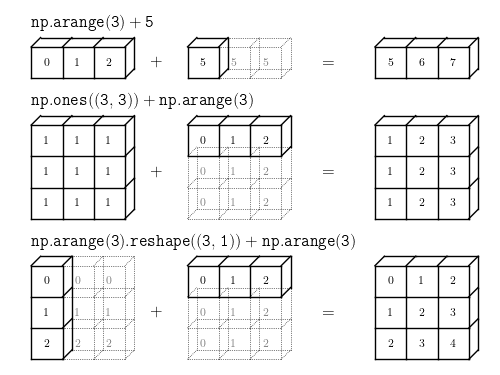

In [285]:
a = np.array([20, 30, 40, 50])
b = np.array(4)

print(a-b) # 각 요소마다 -연산
print('-' * 30)

print([1, 2, 3] * 2) # 파이썬 list 곱
print(a * 2) # array 각 요소 곱

[16 26 36 46]
------------------------------
[1, 2, 3, 1, 2, 3]
[ 40  60  80 100]


# random 모듈을 이용한 배열의 생성

In [316]:
import numpy as np
import matplotlib.pyplot as plt

## np.random.rand()
- 0이상 1미만의 임의의 균등 분포를 갖는 실수를 만든다.
- shape을 전달하면 그 크기에 맞는 다차원 배열을 생성한다.

In [315]:
a = np.random.rand() # 난수 1개 발생
print(a)

b = np.random.rand(3) # 1차원 배열 생성
print(b)

c = np.random.rand(3, 4) # 3x4 2차원 배열 생성
print(c)

0.9568533263731646
[0.48655367 0.10593306 0.34003729]
[[0.83557079 0.46544163 0.09285611 0.85469414]
 [0.33725819 0.60614675 0.1126646  0.54392045]
 [0.72079858 0.86581537 0.14670112 0.10338107]]


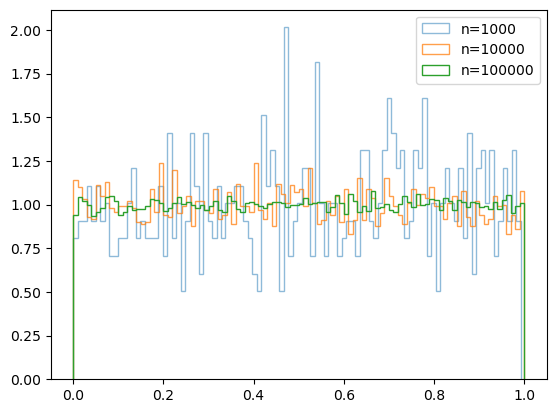

In [323]:
# 균등분포 그래프 확인

a = np.random.rand(1000)
b = np.random.rand(10000)
c = np.random.rand(100000)

plt.hist(a, bins=100, density=True, alpha=0.5, histtype='step', label='n=1000') # bins: 100개의 구간으로 나눔
plt.hist(b, bins=100, density=True, alpha=0.75, histtype='step', label='n=10000') # alpha: 투명도
plt.hist(c, bins=100, density=True, alpha=1, histtype='step', label='n=100000')  # histtype: 그래프 모양?

plt.legend()
plt.show()

## np.random.randint()
- np.random.randint(이상, 미만, 사이즈)
- 주어진 범위의 임의의 균등분포 정수를 만든다.

In [441]:
# 파이썬의 random은 0이상 3이하 임의의 정수,
# 0이상 3미만의 임의의 정수 1개 생성
a = np.random.randint(3)
print(a)

# 0이상 3미만의 임의의 정수 10개 생성
b = np.random.randint(3, size=10)
print(b)

# 2이상 5미만의 임의의 정수 1개 생성
c = np.random.randint(2, 5)
print(c)

# 0이상 100미만의 임의의 정수를 100x100 2차원 배열로 생성
d = np.random.randint(0, 100, (100, 100))
print(d)

2
[2 2 2 0 1 2 0 0 1 1]
3
[[11 22  6 ... 19 77 33]
 [ 4 39 67 ... 15 71 48]
 [28 83 27 ...  0 37 72]
 ...
 [ 8 47 89 ... 60 70 52]
 [ 4 93 94 ... 96 11 42]
 [61 17 17 ... 50 81 91]]


## np.random.randn()
- 표준정규분포(표준편차는 1, 평균은 0으로 이루어진 데이터)로부터 샘플링된 난수를 발생

In [467]:
# 난수 1개 발생
a = np.random.randn()
print(a)

# 2차원 배열로 생성
b = np.random.randn(100, 100)
print(b)
print('평균: ', np.mean(b))
print('표준편차: ', np.std(b))

0.5246459662366656
[[ 1.37631119 -1.07850043  0.33876168 ...  0.76557509  0.37294337
  -2.09033498]
 [-0.69498119 -0.4908467   0.24306606 ...  0.0924502   1.7438301
   1.259851  ]
 [ 0.51488229  0.50550417 -1.9702981  ...  1.40327083 -0.12319397
   1.68205913]
 ...
 [ 0.73944122  0.63890789 -2.92029969 ...  0.26026947  0.1512656
  -0.22008451]
 [-0.44722592 -1.52131802  0.29570854 ... -1.02176455 -1.04389165
   0.32944887]
 [ 0.22513616  1.47169244 -0.46251334 ...  2.055482    0.20043429
  -0.3488411 ]]
평균:  -0.008885554619605319
표준편차:  0.9991879507733825


## np.random.choice()
- 주어진 1차원 행렬에서 랜덤으로 샘플링 한다.
- replace=False: 중복 샘플링을 하지 않는다. (default: replace=True)

In [482]:
data = np.array([4, 2, 5, 7, 2, 10, 5, 7, 2, 11])
a = np.random.choice(data, size=(3, ), replace=False)
print(a)

[ 2 10  5]
